### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# Importing Necessary Liabraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
# Importing Dataset
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\Telecom_customer_churn.csv")

In [3]:
# Printing first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Converting datatype of TotalCharges from string to numeric
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df = df[df.TotalCharges!=' ']

In [7]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
# Checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

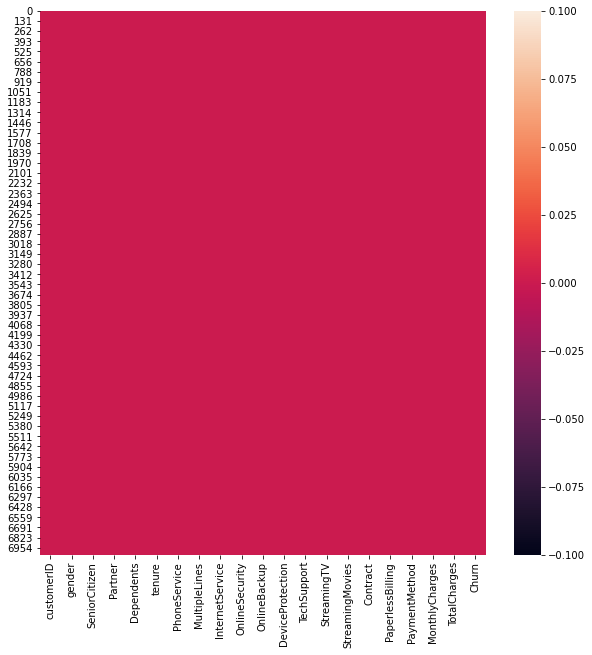

In [10]:
# Visul representation of no null
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.show()

We can see we dont have any null values in our dataset

In [11]:
# Printing value counts for all categorical columns
for column in df:
    if np.dtype(df[column])=='O':
        print(df[column].value_counts())
        
    else:
        continue
       
       

6258-NGCNG    1
4628-WQCQQ    1
1015-OWJKI    1
2074-GUHPQ    1
5054-IEXZT    1
             ..
7636-XUHWW    1
2460-FPSYH    1
4821-SJHJV    1
5792-JALQC    1
4871-JTKJF    1
Name: customerID, Length: 7032, dtype: int64
Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: in

In [12]:
# Replacing invalid values with valid 
df = df.replace('No internet service', 'No')


In [13]:
df['PhoneService'] = df['PhoneService'].replace('No phone service','No')
df['MultipleLines'] = df['PhoneService'].replace('No phone service','No')

In [14]:
for column in df:
    if np.dtype(df[column])=='O':
        print(df[column].value_counts())
        
    else:
        continue
       
       

6258-NGCNG    1
4628-WQCQQ    1
1015-OWJKI    1
2074-GUHPQ    1
5054-IEXZT    1
             ..
7636-XUHWW    1
2460-FPSYH    1
4821-SJHJV    1
5792-JALQC    1
4871-JTKJF    1
Name: customerID, Length: 7032, dtype: int64
Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
Yes    6352
No      680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64
No     4992
Yes    2040
Name: TechSupport, dtype: int64
No     4329
Yes    2703
Name: StreamingTV, dtype: int64
No     4301
Yes    2731
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1685
One year 

We can see now we have valid unique values in our dataset

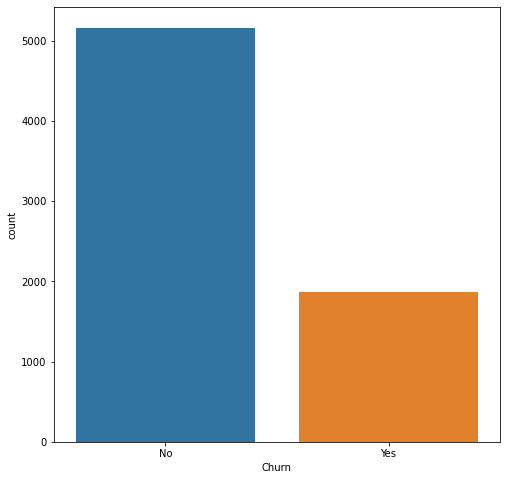

In [16]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn', data = df)
plt.show()

Printing the countplot of label shows that we dont have a balaned dataset we have more customers with not churn than that of churn

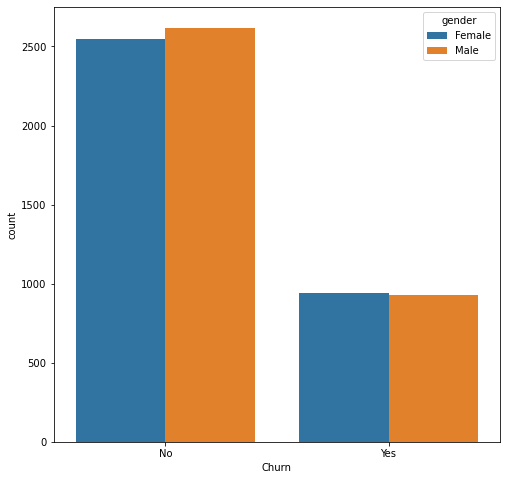

In [17]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'gender',data = df)
plt.show()

We can see we can see churn is irrelevant og the gender , male and female have same percentage of churn

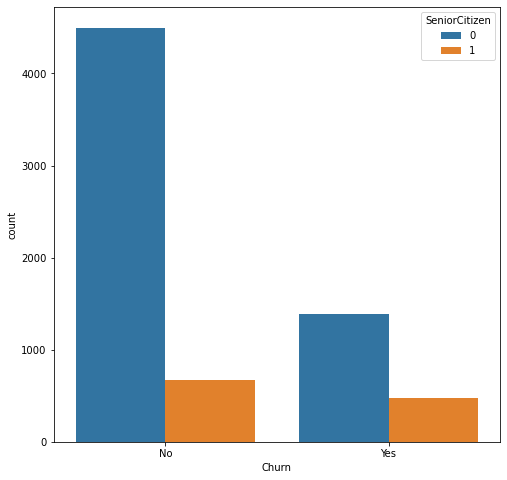

In [18]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'SeniorCitizen',data = df)
plt.show()

Above graph shows that Senior Citizen are less likely to leave the service

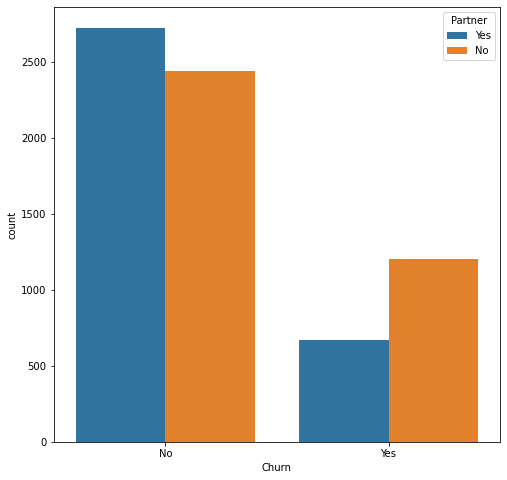

In [19]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'Partner',data = df)
plt.show()

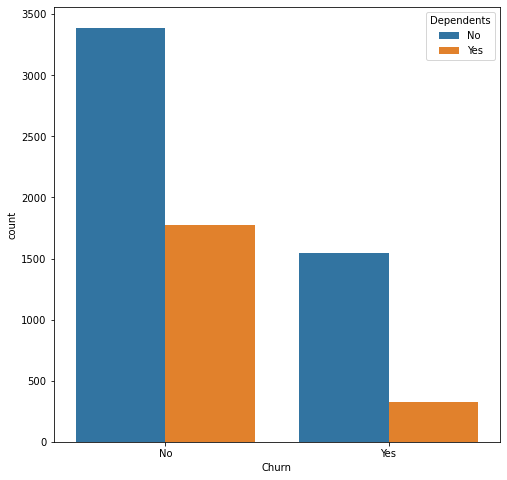

In [20]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'Dependents',data = df, )
plt.show()

Customers with no dependents are more likely to leave the service

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

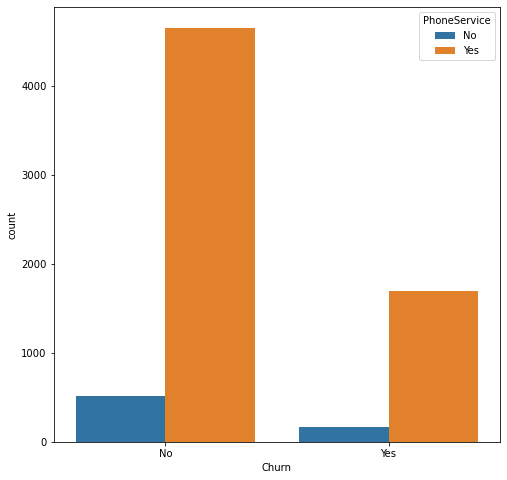

In [22]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'PhoneService',data = df, )
plt.show()

Customers who are already using phone service are more likely to leave the service

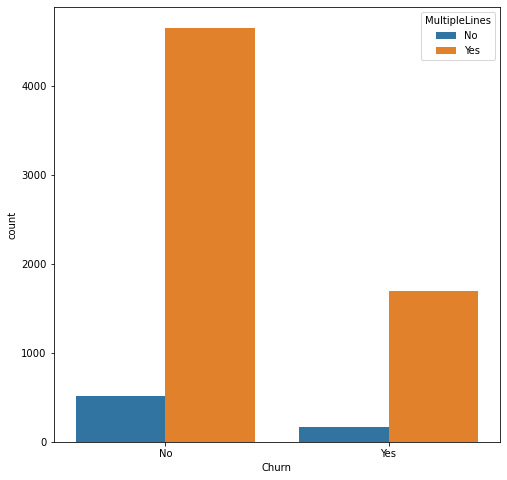

In [23]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'MultipleLines',data = df, )
plt.show()

We can see customers having multiple lines are are more likely to leave the service 

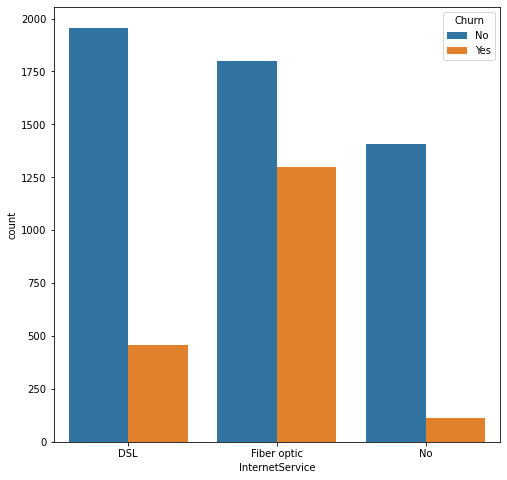

In [24]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'InternetService',hue = 'Churn',data = df, )
plt.show()

Customers Using Fiber Optic Internate service are more likely to leave the serivice whareas customers with no internate service rarely leaves the service

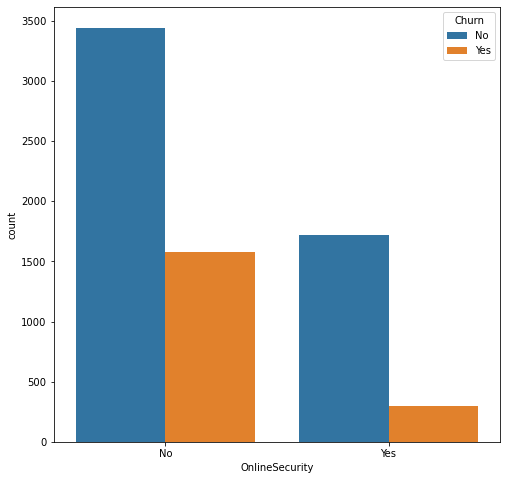

In [25]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'OnlineSecurity',hue = 'Churn',data = df, )
plt.show()

Customers with no Online security are more in number wheb it comes to leaving the company

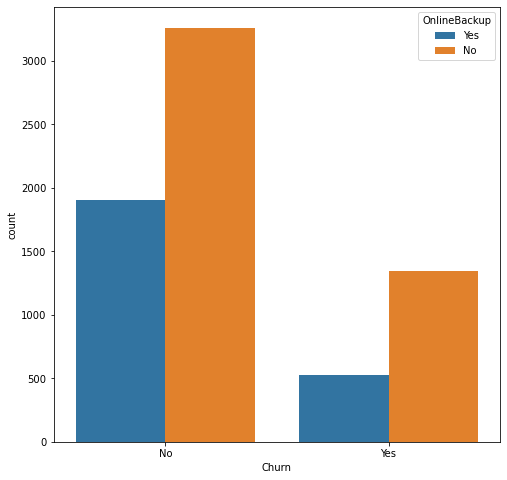

In [26]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'Churn',hue = 'OnlineBackup',data = df, )
plt.show()

Customers with no Online backup are more in number and less likely to leave the service

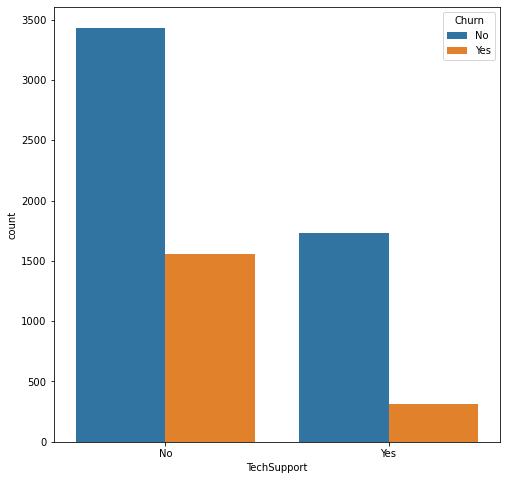

In [27]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'TechSupport',hue = 'Churn',data = df, )
plt.show()

Customers with no TechSupport are more likely to leave the company service

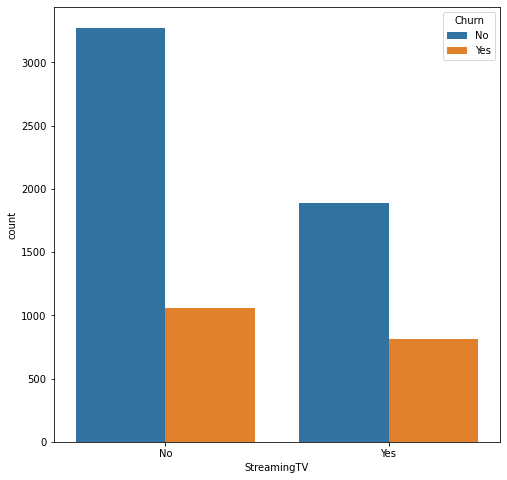

In [28]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'StreamingTV',hue = 'Churn',data = df, )
plt.show()

Customers who are not stresming TV are less likely to leave the company service

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,Yes,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


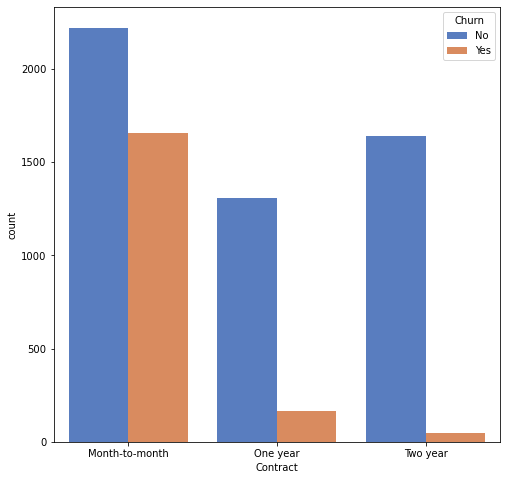

In [30]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'Contract',hue = 'Churn',data = df,palette = 'muted' )
plt.show()

Above graph shows that Customers with Month to Month contract are more likely to leave the service and customers with two years contract rarely leaves the company service 

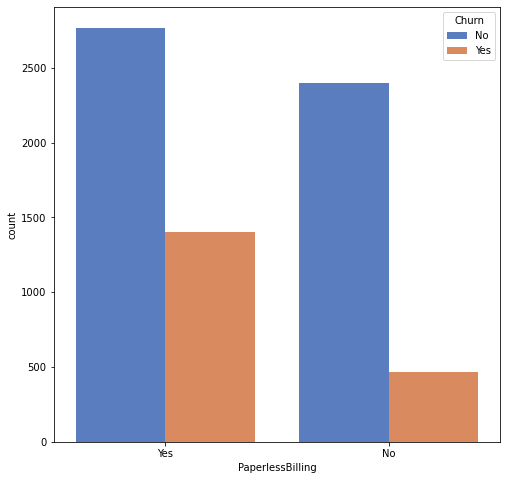

In [31]:

plt.figure(figsize = (8,8))
sns.countplot( x = 'PaperlessBilling',hue = 'Churn',data = df,palette = 'muted' )
sns.color_palette("rocket", as_cmap=True)
plt.show()

Customers with Paperless billing are more likely to leave the company service

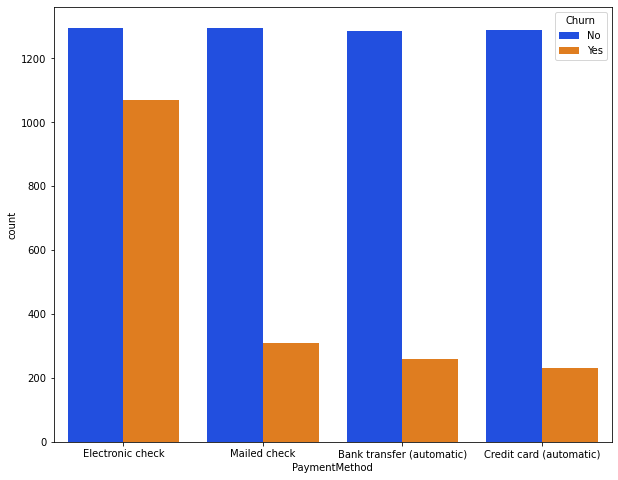

In [32]:
plt.figure(figsize = (10,8))
sns.countplot( x = 'PaymentMethod',hue = 'Churn',data = df,palette = 'bright' )

plt.show()

Customers using Electronic Check as payment methode are more likely to leave the company service

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

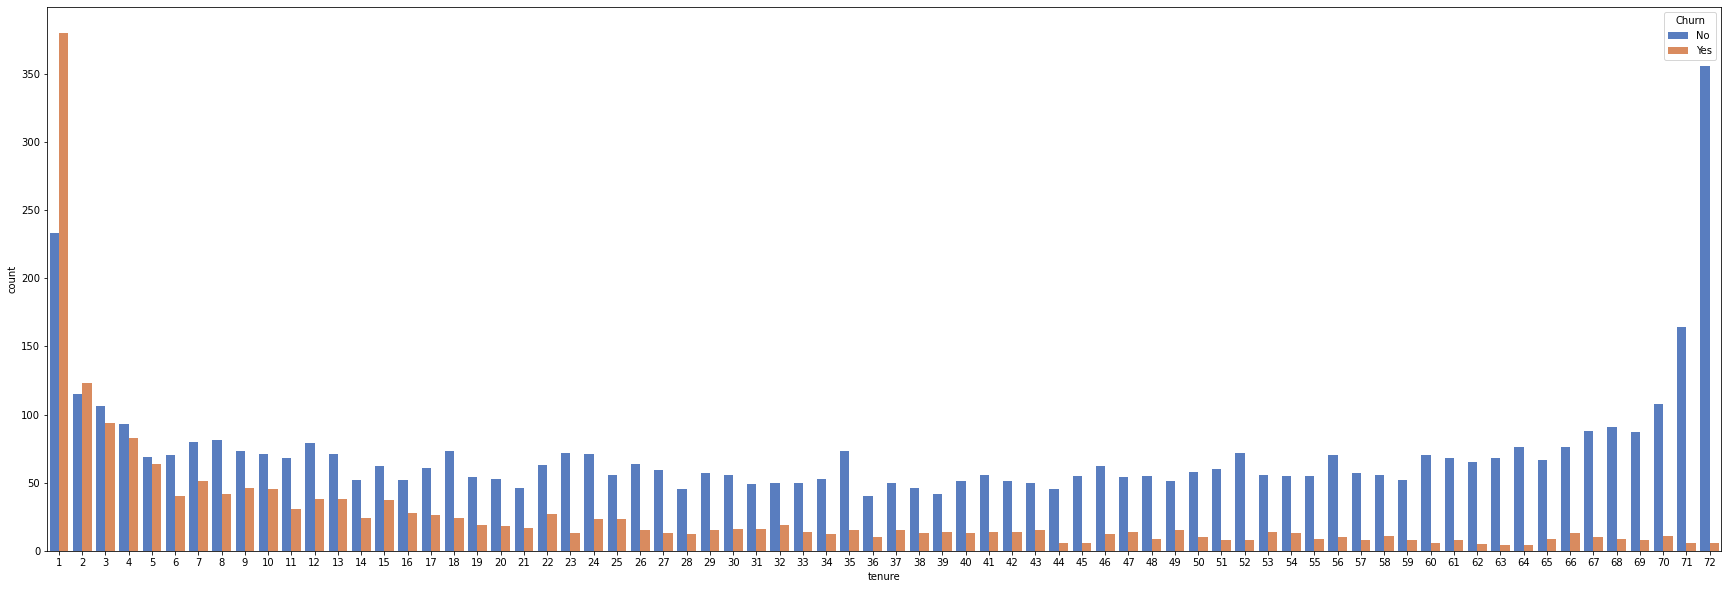

In [34]:

plt.figure(figsize = (30,10))
sns.countplot( x = 'tenure',hue = 'Churn',data = df,palette = 'muted' )
sns.color_palette("rocket", as_cmap=True)
plt.show()

We can see customer tenure is inversly proprtional to the churn that is old customers are less likely to leave the company while new customers are more likely to leave the company

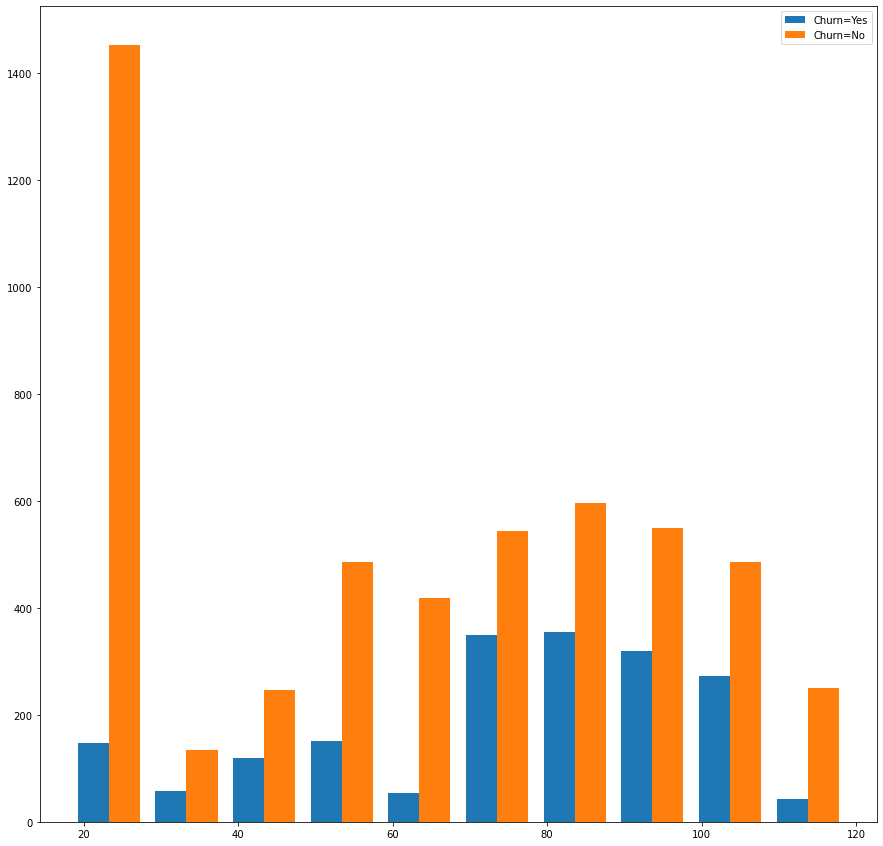

In [35]:
mc_no = df[df.Churn=='No'].MonthlyCharges
mc_yes = df[df.Churn=='Yes'].MonthlyCharges
plt.figure(figsize =(15,15))
plt.hist([mc_yes,mc_no], label = ['Churn=Yes', 'Churn=No'] )
plt.legend()

Customers with Monthly charges 70 to 100 are more likely to leave the company

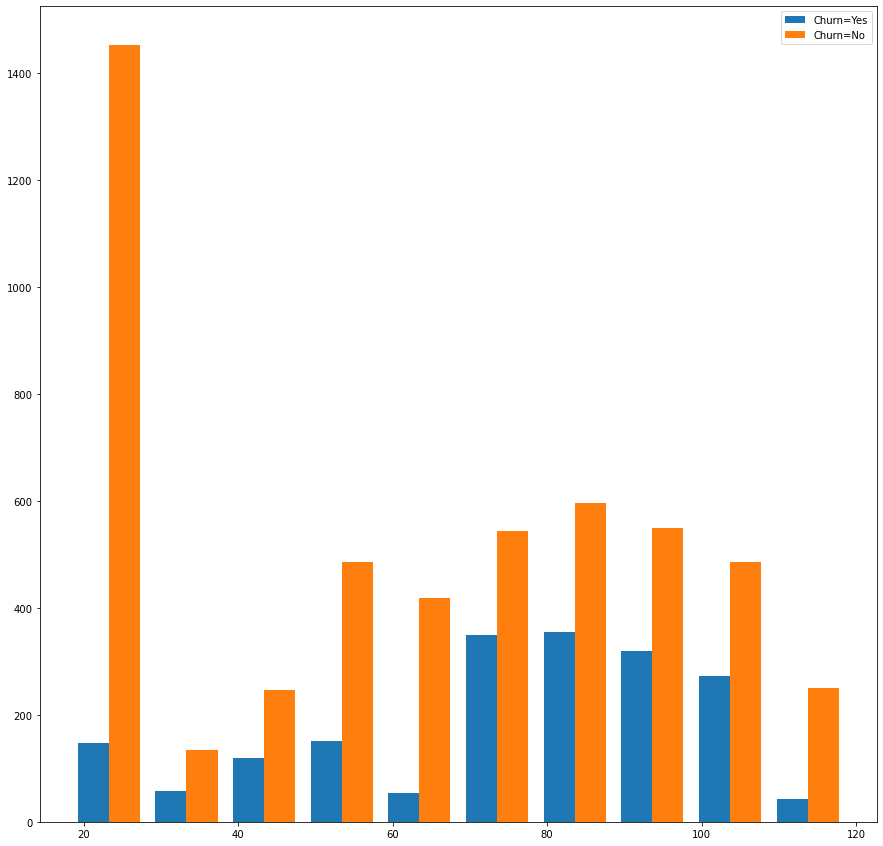

In [36]:
tc_no = df[df.Churn=='No'].TotalCharges
tc_yes = df[df.Churn=='Yes'].TotalCharges
plt.figure(figsize =(15,15))
plt.hist([mc_yes,mc_no], label = ['Churn=Yes', 'Churn=No'] )
plt.legend()

Same as monthly charges customers with Total charges 70 to 110 are more likely to leave the company service

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,Yes,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
# Encoding cateforical columns into binary columns
df.replace({'Yes':1, 'No':0}, inplace = True)
df['gender'].replace({'Male':1, 'Female':0}, inplace = True)

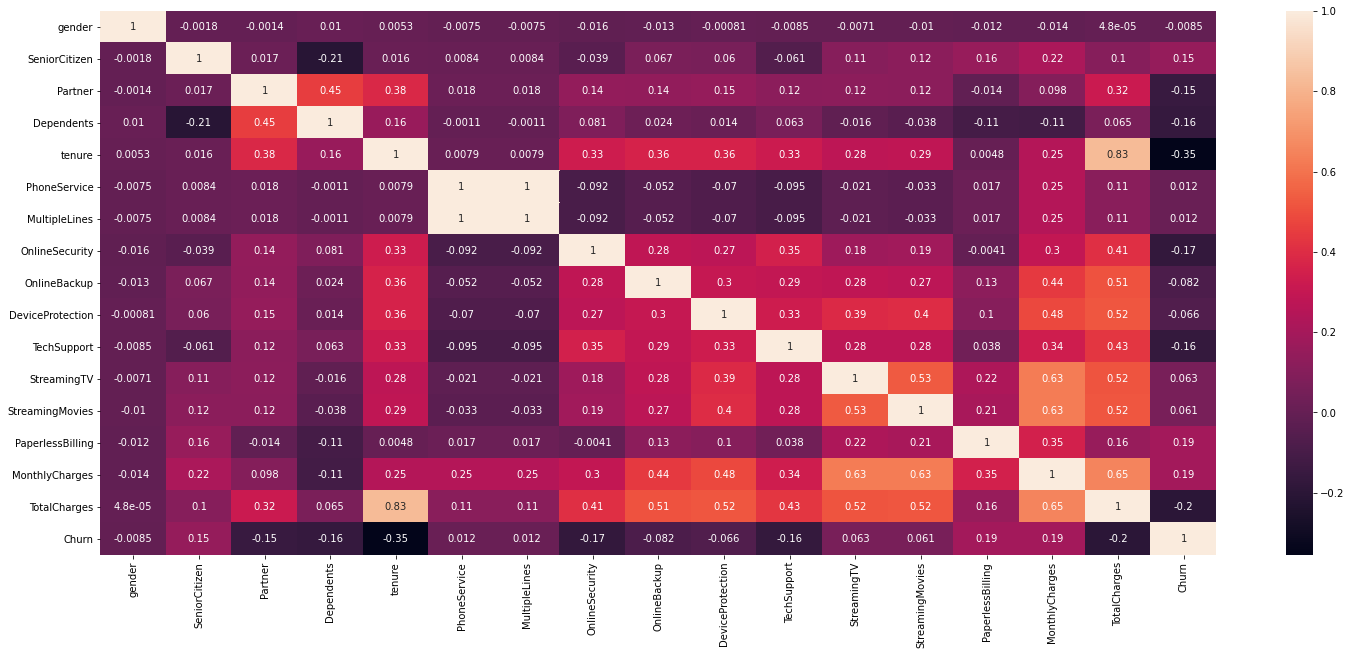

In [39]:
# Plotting Heatmap for correlation
plt.figure(figsize =(25,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Heatmap Analysiis - 
* Our target Variable is negatively related to Online security , online backup, Tech support, device protection,tenure, gender , partner , dependents

* Mutiple lines and Phones services are 100 % correlated we can drop one of them
 

In [40]:
# Dropping highcorrelated column
df.drop('MultipleLines', axis ='columns', inplace = True)

In [41]:
df.shape

(7032, 20)

In [42]:
# encoding categorical columns with one hot encoder
def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis = 1)
        df.drop(column, axis = 1 , inplace = True)
        
    return df

In [43]:
# Encoding Catregrical columsn(Wind-direction)
cat_feat = ['InternetService','Contract','PaymentMethod',]

df = onehot_encoder(df,cat_feat )



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   gender                     7032 non-null   int64  
 2   SeniorCitizen              7032 non-null   int64  
 3   Partner                    7032 non-null   int64  
 4   Dependents                 7032 non-null   int64  
 5   tenure                     7032 non-null   int64  
 6   PhoneService               7032 non-null   int64  
 7   OnlineSecurity             7032 non-null   int64  
 8   OnlineBackup               7032 non-null   int64  
 9   DeviceProtection           7032 non-null   int64  
 10  TechSupport                7032 non-null   int64  
 11  StreamingTV                7032 non-null   int64  
 12  StreamingMovies            7032 non-null   int64  
 13  PaperlessBilling           7032 non-null   int64

In [45]:
# dropping unecessry columns
df.drop('customerID', axis ='columns', inplace = True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

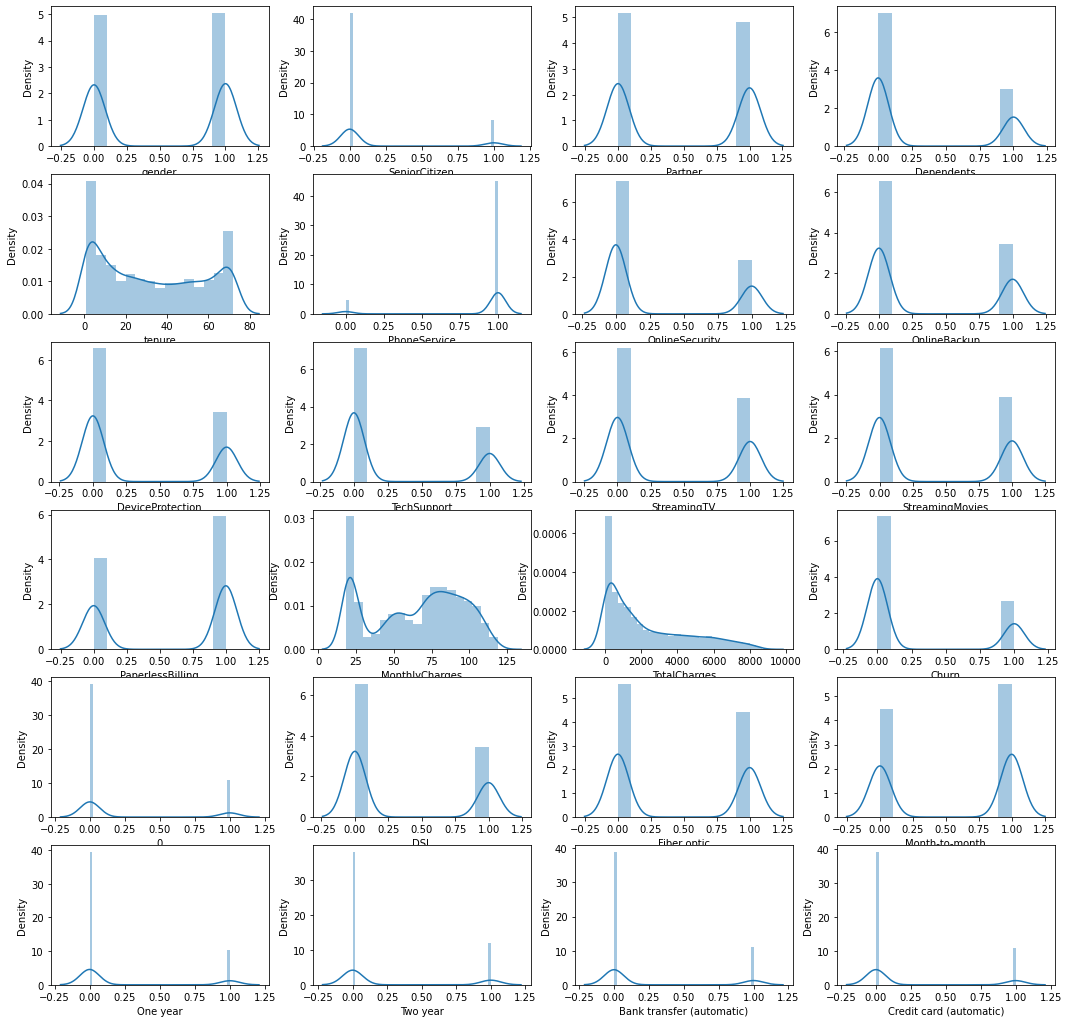

In [46]:
# Checking data distrubution
plt.figure(figsize = (18,18))

plotno = 1

for column in df:
    if plotno<=24:
        ax= plt.subplot(6,4, plotno)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotno +=1
    
plt.tight_layout

Since our most of the columns are categorical cant really say they are not normally distributed but we can see monthly charges and total charges has some skewness which needs to be removed

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

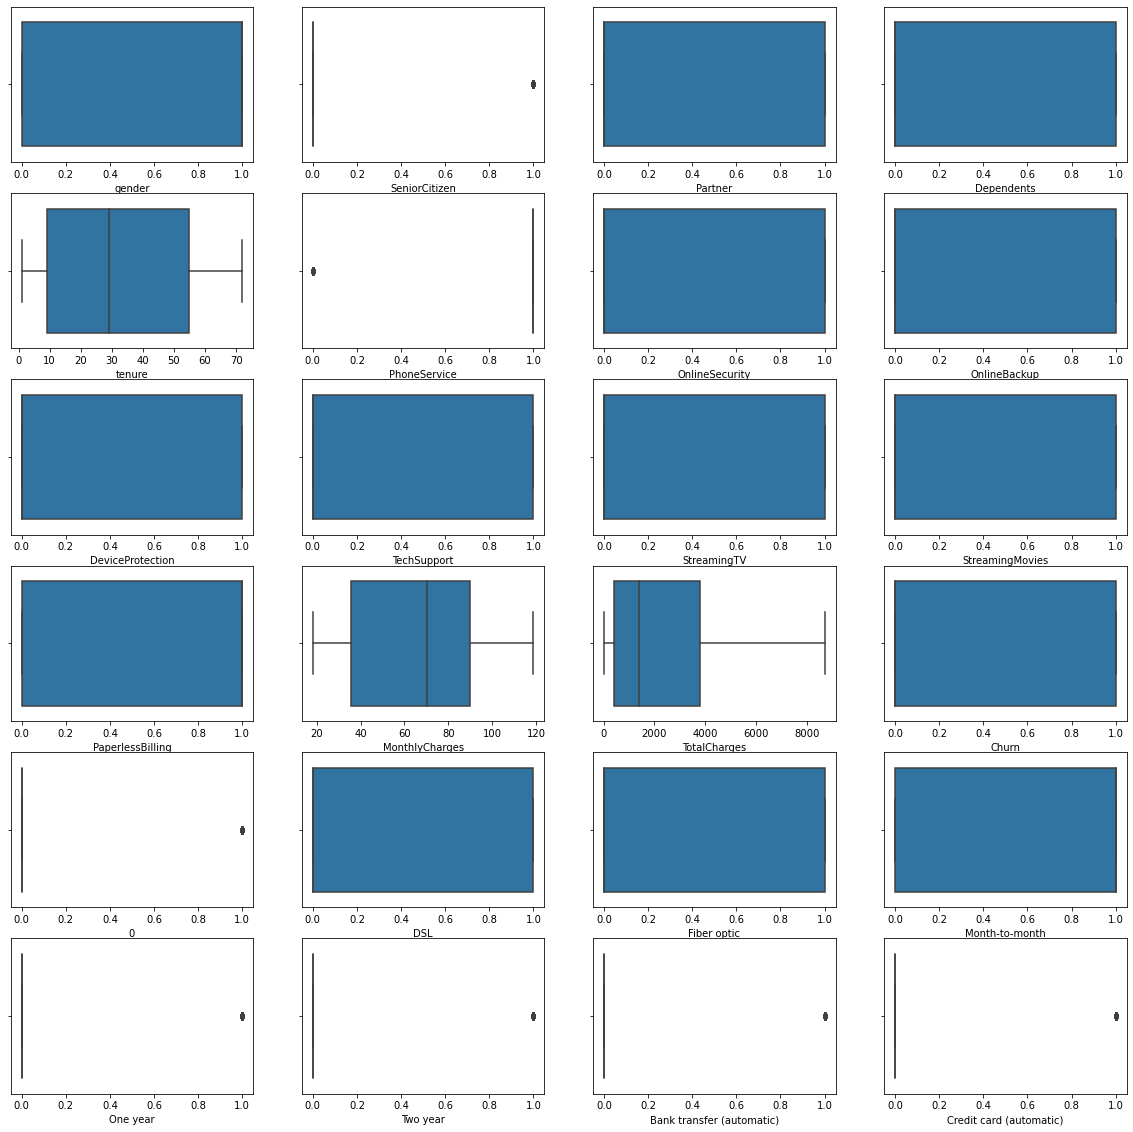

In [47]:
# Checking for Outliers

plt.figure(figsize = (20,20))

plotno = 1

for column in df:
    if plotno<=24:
        ax = plt.subplot(6,4,plotno)
        sns.boxplot(df[column], orient = "V")
        plt.xlabel(column)
        
    plotno +=1
    
plt.tight_layout

We have only two numerical features and both of them are not having any outlier

In [48]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,0,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [49]:
# splitting data into label and features
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [50]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,0,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


As we can see our target column is imbalnced we need to balance it before model fitting

In [51]:
# Data Scaling Using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [52]:
# Importing necessry liabraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



In [53]:
# checking for best random state for data split
maxAcc = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    

    

Best Accuracy= 0.8270762229806599 Random state= 439


In [54]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=439)

<AxesSubplot:xlabel='Churn', ylabel='count'>

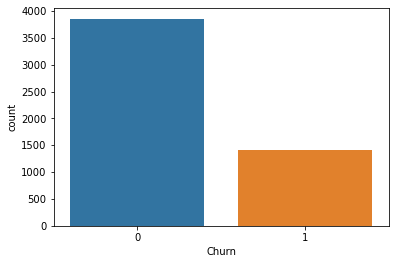

In [55]:
sns.countplot(y_train)

As we can see we have imbalnced label column we need to balance it before model fitting

In [56]:
# Imporing Liabraries for oversampling
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
from collections import Counter
Counter(y_train)

Counter({0: 3859, 1: 1415})

In [57]:
# Importing SMOTE for OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()

ove_smp = SMOTE(0.80)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train,y_train)

print ("number of samples before fit{}".format(Counter(y_train))) 
print ("number of samples after fit{}".format(Counter(y_train_ns)))   


number of samples before fitCounter({0: 3859, 1: 1415})
number of samples after fitCounter({0: 3859, 1: 3087})


<AxesSubplot:xlabel='Churn', ylabel='count'>

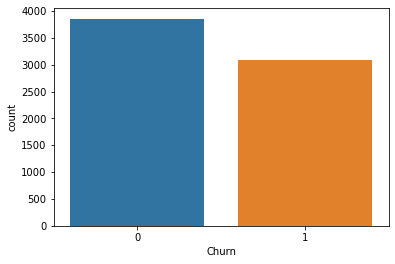

In [58]:
sns.countplot(y_train_ns)

Now we can see our label column is somehow balanced

In [59]:
y_train = y_train_ns
x_train = x_train_ns

In [60]:
# Model fitting with Logistic regreession
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))


Accuracy 78.89647326507395
[[1036  268]
 [ 103  351]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1304
           1       0.57      0.77      0.65       454

    accuracy                           0.79      1758
   macro avg       0.74      0.78      0.75      1758
weighted avg       0.82      0.79      0.80      1758



In [61]:
# ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy 0.7315130830489193
[[1027  277]
 [ 195  259]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1304
           1       0.48      0.57      0.52       454

    accuracy                           0.73      1758
   macro avg       0.66      0.68      0.67      1758
weighted avg       0.75      0.73      0.74      1758



In [62]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accurecy',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accurecy 81.05802047781569
[[1141  163]
 [ 170  284]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1304
           1       0.64      0.63      0.63       454

    accuracy                           0.81      1758
   macro avg       0.75      0.75      0.75      1758
weighted avg       0.81      0.81      0.81      1758



In [63]:
#ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 80.2047781569966
[[1065  239]
 [ 109  345]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1304
           1       0.59      0.76      0.66       454

    accuracy                           0.80      1758
   macro avg       0.75      0.79      0.76      1758
weighted avg       0.83      0.80      0.81      1758



In [64]:
#ModeL building with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train,y_train)

y_pred = gbk.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy= 81.11490329920365
Confusion Matrix [[1116  188]
 [ 144  310]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.87      1304
           1       0.62      0.68      0.65       454

    accuracy                           0.81      1758
   macro avg       0.75      0.77      0.76      1758
weighted avg       0.82      0.81      0.81      1758



In [65]:
# Checking cross validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())

scr = cross_val_score(dt, x,y, cv=8)
print("Cross validation score for Decision tree is", scr.mean())

scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for RandomForestClassifier is", scr.mean())

scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for SVC is", scr.mean())

scr = cross_val_score(gbk, x,y, cv=8)
print("Cross validation score for GradientBoostingClassifier is", scr.mean())




Cross validation score for Logistic Regression is 0.8026166097838453
Cross validation score for Decision tree is 0.731655290102389
Cross validation score for RandomForestClassifier is 0.7861205915813424
Cross validation score for SVC is 0.7980659840728099
Cross validation score for GradientBoostingClassifier is 0.8027588168373151


Cross validation shows that our Gradientboost is performing better than others , so tunning hyperparameters for Gridentboost model

In [85]:
# Hyper-Parameter tunning for Gradient boosting Classifier
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[9,13,15,20,25,],
         'max_depth':[8,10,15,20],
         'min_samples_split':[10,12,8,14],
         'min_samples_leaf':[5,6,7,9]
         }

In [86]:

grid = GridSearchCV(estimator =GradientBoostingClassifier(max_features='sqrt', random_state=10), 
            param_grid = params, scoring='accuracy',n_jobs=4, cv=5)
grid.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=10),
             n_jobs=4,
             param_grid={'max_depth': [8, 10, 15, 20],
                         'min_samples_leaf': [5, 6, 7, 9],
                         'min_samples_split': [10, 12, 8, 14],
                         'n_estimators': [9, 13, 15, 20, 25]},
             scoring='accuracy')

In [88]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 25}
GradientBoostingClassifier(max_depth=20, max_features='sqrt',
                           min_samples_leaf=6, min_samples_split=14,
                           n_estimators=25, random_state=10)


In [89]:
grid_predictions = grid.predict(x_test)

In [91]:
grid_predictions=grid.best_estimator_.predict(x_test)

In [92]:
print('Accuracy',accuracy_score(y_test,grid_predictions)*100)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Accuracy 80.43230944254836
[[1129  175]
 [ 169  285]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1304
           1       0.62      0.63      0.62       454

    accuracy                           0.80      1758
   macro avg       0.74      0.75      0.75      1758
weighted avg       0.81      0.80      0.80      1758



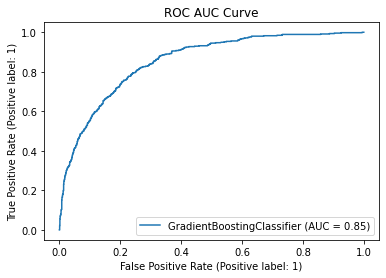

In [93]:
# ROC AUC Curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [94]:
# Saving Model
import joblib


joblib.dump(grid.best_estimator_,"Customer_churn.pkl")

['Customer_churn.pkl']